In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as olt
import seaborn as sns

In [3]:
emp_df=pd.read_csv("test.csv")
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [3]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [4]:
emp_df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [6]:
cat_cols = ['Gender', 'Job Role', 'Marital Status', 'Overtime','Work-Life Balance', 'Job Satisfaction', 'Attrition']

for col in cat_cols:
    emp_df[col]=emp_df[col].astype('category')

In [7]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Employee ID               14900 non-null  int64   
 1   Age                       14900 non-null  int64   
 2   Gender                    14900 non-null  category
 3   Years at Company          14900 non-null  int64   
 4   Job Role                  14900 non-null  category
 5   Monthly Income            14900 non-null  int64   
 6   Work-Life Balance         14900 non-null  category
 7   Job Satisfaction          14900 non-null  category
 8   Performance Rating        14900 non-null  object  
 9   Number of Promotions      14900 non-null  int64   
 10  Overtime                  14900 non-null  category
 11  Distance from Home        14900 non-null  int64   
 12  Education Level           14900 non-null  object  
 13  Marital Status            14900 non-null  cate

In [8]:
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [10]:
emp_df["Attrition"].value_counts(normalize=True)*100

Attrition
Stayed    52.805369
Left      47.194631
Name: proportion, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_12944\1511169901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_monthly_income=emp_df.groupby("Attrition")["Monthly Income"].mean()


<Axes: xlabel='Attrition'>

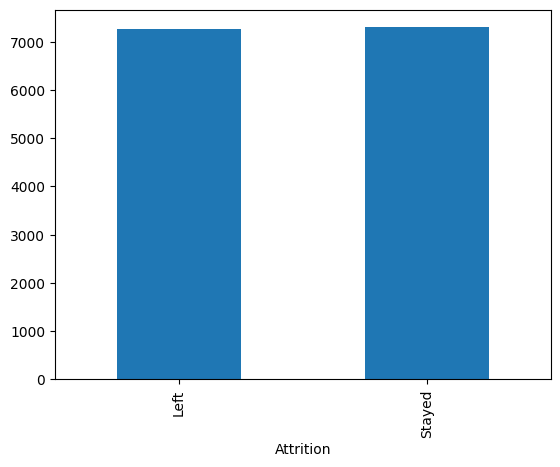

In [14]:
avg_monthly_income=emp_df.groupby("Attrition")["Monthly Income"].mean()
avg_monthly_income.plot.bar()

In [18]:
emp_df["Attrition_flag"]=emp_df["Attrition"].map({"Left":1,"Stayed":0})
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Attrition_flag
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,Mid,Large,22,No,No,No,Poor,Medium,Stayed,0
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,Entry,Medium,27,No,No,No,Good,High,Left,1
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,Senior,Medium,76,No,No,Yes,Good,Low,Stayed,0
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,Entry,Medium,96,No,No,No,Poor,Low,Left,1
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,Mid,Large,45,Yes,No,No,Good,High,Stayed,0


In [21]:
emp_df["Attrition_flag"]=emp_df["Attrition_flag"].astype(int)

In [23]:
attrition_by_role=emp_df.groupby("Job Role")["Attrition_flag"].mean()*100
attrition_by_role

C:\Users\User\AppData\Local\Temp\ipykernel_12944\2934507447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_role=emp_df.groupby("Job Role")["Attrition_flag"].mean()*100


Job Role
Education     48.958333
Finance       47.455162
Healthcare    48.310023
Media         44.508671
Technology    46.290957
Name: Attrition_flag, dtype: float64

In [24]:
attrition_by_gender=emp_df.groupby("Gender")["Attrition_flag"].mean()
attrition_by_gender

C:\Users\User\AppData\Local\Temp\ipykernel_12944\2424697226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_gender=emp_df.groupby("Gender")["Attrition_flag"].mean()


Gender
Female    0.524145
Male      0.427971
Name: Attrition_flag, dtype: float64

In [27]:
emp_df["Overtime"]

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
14895    Yes
14896    Yes
14897     No
14898     No
14899     No
Name: Overtime, Length: 14900, dtype: category
Categories (2, object): ['No', 'Yes']

C:\Users\User\AppData\Local\Temp\ipykernel_12944\3367746809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_overtime=emp_df.groupby("Overtime")["Attrition_flag"].mean()


<Axes: xlabel='Overtime'>

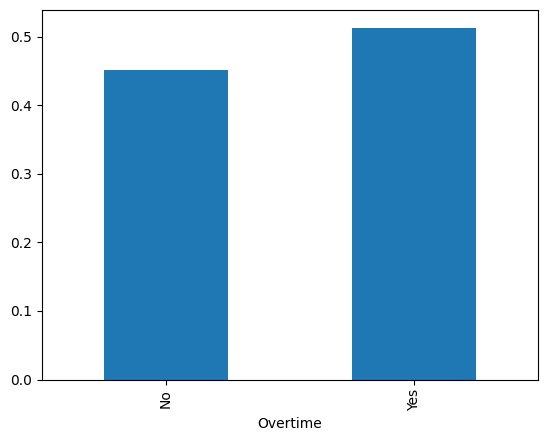

In [29]:
attrition_by_overtime=emp_df.groupby("Overtime")["Attrition_flag"].mean()
attrition_by_overtime.plot(kind="bar")

In [30]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Employee ID               14900 non-null  int64   
 1   Age                       14900 non-null  int64   
 2   Gender                    14900 non-null  category
 3   Years at Company          14900 non-null  int64   
 4   Job Role                  14900 non-null  category
 5   Monthly Income            14900 non-null  int64   
 6   Work-Life Balance         14900 non-null  category
 7   Job Satisfaction          14900 non-null  category
 8   Performance Rating        14900 non-null  object  
 9   Number of Promotions      14900 non-null  int64   
 10  Overtime                  14900 non-null  category
 11  Distance from Home        14900 non-null  int64   
 12  Education Level           14900 non-null  object  
 13  Marital Status            14900 non-null  cate

In [31]:
attrition_by_years=emp_df.groupby("Attrition")["Years at Company"].mean()
attrition_by_years

C:\Users\User\AppData\Local\Temp\ipykernel_12944\266670761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_years=emp_df.groupby("Attrition")["Years at Company"].mean()


Attrition
Left      14.798493
Stayed    16.301983
Name: Years at Company, dtype: float64

In [4]:
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [5]:
emp_df["Job Satisfaction"].unique()

array(['High', 'Very High', 'Medium', 'Low'], dtype=object)

In [6]:
emp_df["Job_satisfaction_rating"]=emp_df["Job Satisfaction"].map({"Low":1,"Medium":2,"High":3,"Very High":4})

In [7]:
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Job_satisfaction_rating
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,Mid,Large,22,No,No,No,Poor,Medium,Stayed,3
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,Entry,Medium,27,No,No,No,Good,High,Left,3
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,Senior,Medium,76,No,No,Yes,Good,Low,Stayed,3
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,Entry,Medium,96,No,No,No,Poor,Low,Left,4
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,Mid,Large,45,Yes,No,No,Good,High,Stayed,3


In [8]:
emp_df["Work-Life Balance"].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [9]:
emp_df["Work-Life Balance_rating"]=emp_df["Work-Life Balance"].map({"Poor":1,"Fair":2,"Good":3,"Excellent":4})

In [10]:
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Job_satisfaction_rating,Work-Life Balance_rating
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,Large,22,No,No,No,Poor,Medium,Stayed,3,4
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,Medium,27,No,No,No,Good,High,Left,3,3
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,Medium,76,No,No,Yes,Good,Low,Stayed,3,2
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,Medium,96,No,No,No,Poor,Low,Left,4,2
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,Large,45,Yes,No,No,Good,High,Stayed,3,3


In [11]:
emp_df["Satisfaction_score"]=emp_df["Job_satisfaction_rating"]*emp_df["Work-Life Balance_rating"]

In [12]:
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Job_satisfaction_rating,Work-Life Balance_rating,Satisfaction_score
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,22,No,No,No,Poor,Medium,Stayed,3,4,12
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,27,No,No,No,Good,High,Left,3,3,9
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,76,No,No,Yes,Good,Low,Stayed,3,2,6
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,96,No,No,No,Poor,Low,Left,4,2,8
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,45,Yes,No,No,Good,High,Stayed,3,3,9


In [13]:
emp_df["Attrition_encode"]=emp_df["Attrition"].map({"Left":0,"Stayed":1})

In [14]:
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Job_satisfaction_rating,Work-Life Balance_rating,Satisfaction_score,Attrition_encode
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,No,No,No,Poor,Medium,Stayed,3,4,12,1
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,No,No,No,Good,High,Left,3,3,9,0
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,No,No,Yes,Good,Low,Stayed,3,2,6,1
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,No,No,No,Poor,Low,Left,4,2,8,0
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,Yes,No,No,Good,High,Stayed,3,3,9,1


In [15]:
emp_df["Job Role"].unique()

array(['Healthcare', 'Education', 'Media', 'Technology', 'Finance'],
      dtype=object)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
jobrole_encode=OneHotEncoder()

In [19]:
encoded_jobroles=jobrole_encode.fit_transform(emp_df[["Job Role"]]).toarray()
encoded_jobroles

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(14900, 5))

In [20]:
encoded_jobroles=pd.DataFrame(encoded_jobroles,columns=jobrole_encode.get_feature_names_out())
encoded_jobroles

,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
14895,0.0,0.0,1.0,0.0,0.0
14896,1.0,0.0,0.0,0.0,0.0
14897,1.0,0.0,0.0,0.0,0.0
14898,1.0,0.0,0.0,0.0,0.0


In [23]:
emp_df_copy=pd.concat([emp_df,encoded_jobroles],axis=1)

In [24]:
emp_df_copy.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Attrition,Job_satisfaction_rating,Work-Life Balance_rating,Satisfaction_score,Attrition_encode,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,Stayed,3,4,12,1,0.0,0.0,1.0,0.0,0.0
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,Left,3,3,9,0,1.0,0.0,0.0,0.0,0.0
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,Stayed,3,2,6,1,1.0,0.0,0.0,0.0,0.0
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,Left,4,2,8,0,0.0,0.0,0.0,1.0,0.0
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,Stayed,3,3,9,1,1.0,0.0,0.0,0.0,0.0


In [25]:
emp_df["Marital Status"].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [26]:
marital_encoder=OneHotEncoder()

In [29]:
encoded_msts=marital_encoder.fit_transform(emp_df[["Marital Status"]]).toarray()
encoded_msts

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(14900, 3))

In [30]:
encoded_msts=pd.DataFrame(encoded_msts,columns=marital_encoder.get_feature_names_out())
encoded_msts

,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
14895,0.0,0.0,1.0
14896,0.0,1.0,0.0
14897,0.0,1.0,0.0
14898,1.0,0.0,0.0


In [32]:
emp_df_copy=pd.concat([emp_df_copy,encoded_msts],axis=1)
emp_df_copy.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Satisfaction_score,Attrition_encode,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,12,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,9,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,6,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,8,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,9,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
emp_df_copy["Attrition_encode"].value_counts()

Attrition_encode
1    7868
0    7032
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
oversampling=SMOTE()

In [41]:
X,Y=oversampling.fit_resample(emp_df_copy[["Attrition_encode"]],emp_df_copy[["Attrition"]])

In [43]:
X.value_counts()

Attrition_encode
0                   7868
1                   7868
Name: count, dtype: int64

In [44]:
Y.value_counts()

Attrition
Left         7868
Stayed       7868
Name: count, dtype: int64

In [47]:
X

,Attrition_encode
0,1
1,0
2,1
3,0
4,1
...,...
15731,0
15732,0
15733,0
15734,0


In [55]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [53]:
num_features=[]
for col in emp_df.columns:
    if (emp_df[col].dtype=='int') or (emp_df[col].dtype=='float'):
        num_features.append(col)

In [54]:
num_features

['Employee ID',
 'Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure',
 'Job_satisfaction_rating',
 'Work-Life Balance_rating',
 'Satisfaction_score',
 'Attrition_encode']

In [56]:
corr_num=emp_df_copy[num_features].corr()
corr_num

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Job_satisfaction_rating,Work-Life Balance_rating,Satisfaction_score,Attrition_encode
Employee ID,1.000000,0.017748,0.006994,-0.010606,0.014348,0.003551,0.002005,-0.010541,-0.006921,0.003568,-0.000864,0.001002
Age,0.017748,1.000000,0.527232,-0.000879,0.002710,0.005195,0.006844,0.233444,-0.008560,-0.008827,-0.011017,0.058488
Years at Company,0.006994,0.527232,1.000000,-0.008806,0.005669,0.003360,0.006156,0.444186,0.001421,-0.004308,-0.001774,0.067415
Monthly Income,-0.010606,-0.000879,-0.008806,1.000000,0.002694,0.000520,-0.002768,-0.012999,0.000541,0.009544,0.007107,0.007973
Number of Promotions,0.014348,0.002710,0.005669,0.002694,1.000000,-0.002674,-0.005089,0.010153,-0.003259,-0.000519,-0.002841,0.083544
Distance from Home,0.003551,0.005195,0.003360,0.000520,-0.002674,1.000000,-0.007378,-0.006307,-0.002746,0.012793,0.007971,-0.086942
Number of Dependents,0.002005,0.006844,0.006156,-0.002768,-0.005089,-0.007378,1.000000,-0.004300,0.012021,-0.009161,0.000503,0.059540
Company Tenure,-0.010541,0.233444,0.444186,-0.012999,0.010153,-0.006307,-0.004300,1.000000,0.003879,-0.022747,-0.015033,0.023702
Job_satisfaction_rating,-0.006921,-0.008560,0.001421,0.000541,-0.003259,-0.002746,0.012021,0.003879,1.000000,-0.001542,0.637878,-0.002761
Work-Life Balance_rating,0.003568,-0.008827,-0.004308,0.009544,-0.000519,0.012793,-0.009161,-0.022747,-0.001542,1.000000,0.734239,0.194977


In [58]:
import matplotlib.pyplot as plt

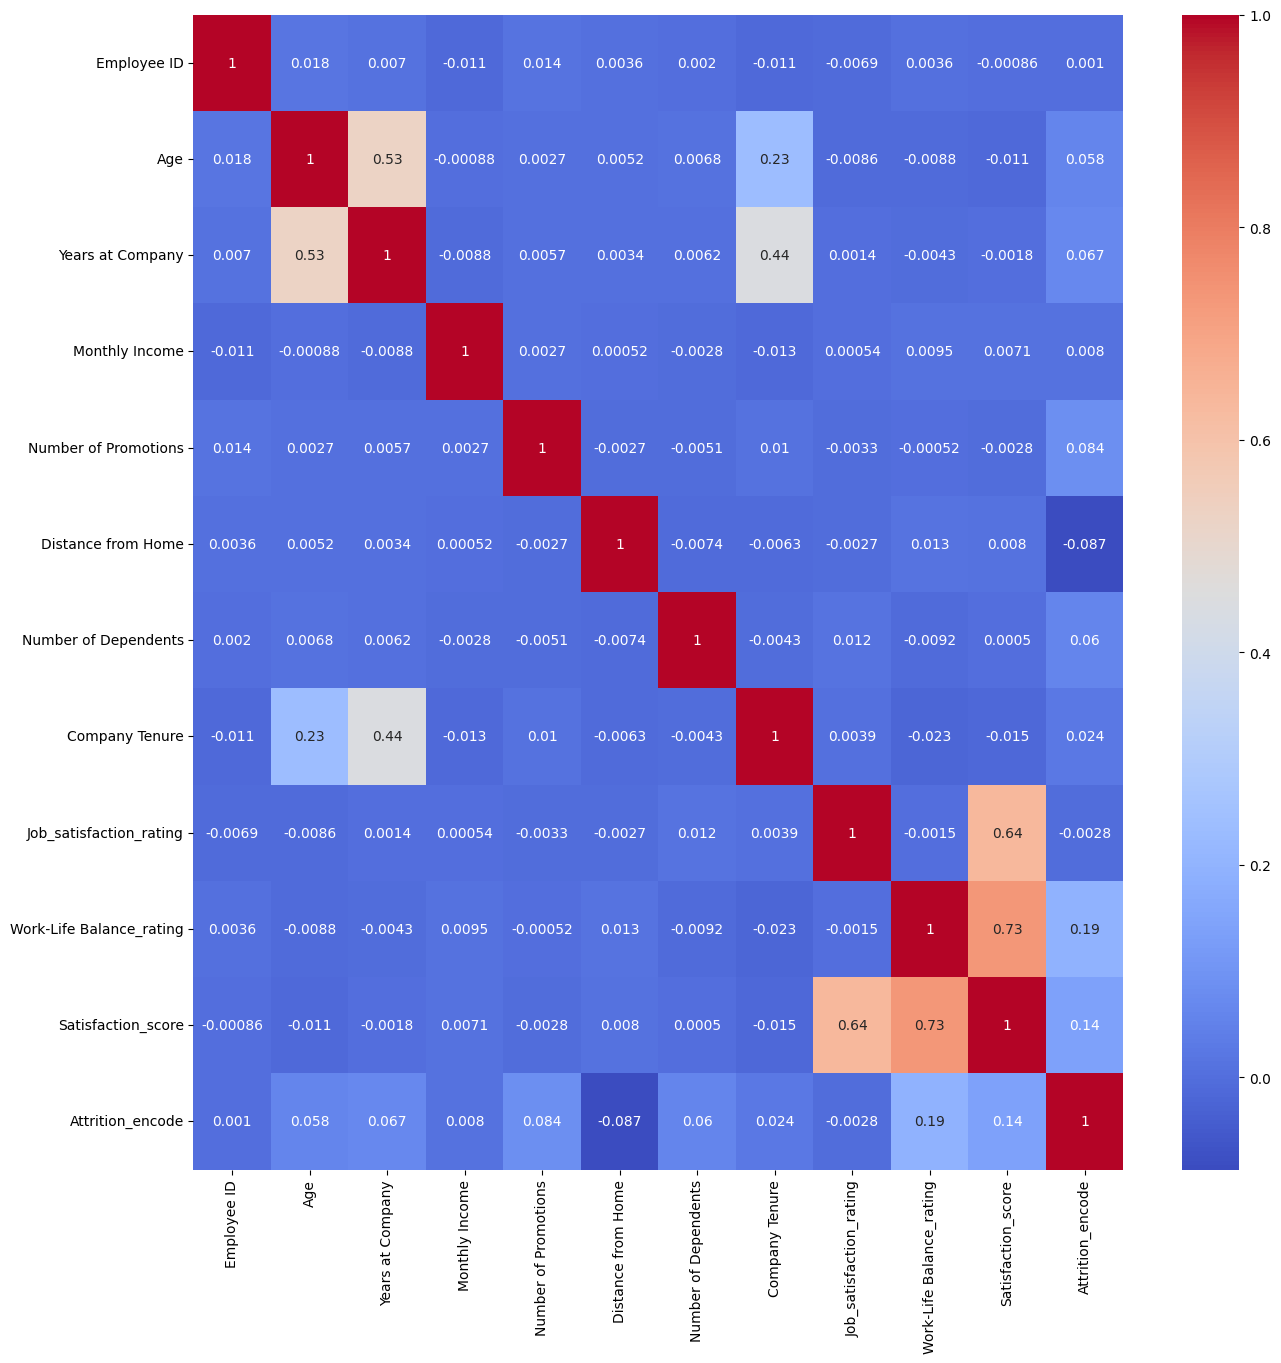

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_num,annot=True,cmap="coolwarm")
plt.show()

In [64]:
emp_df_copy.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Satisfaction_score,Attrition_encode,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,12,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,9,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,6,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,8,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,9,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
emp_df_copy[["Company Size","Attrition_encode"]]

,Company Size,Attrition_encode
0,Large,1
1,Medium,0
2,Medium,1
3,Medium,0
4,Large,1
...,...,...
14895,Medium,1
14896,Medium,0
14897,Small,0
14898,Large,1


In [67]:
company_size_attrition=(emp_df_copy.groupby("Company Size")["Attrition_encode"].mean()*100).reset_index(name="Attrition_rate")
company_size_attrition

,Company Size,Attrition_rate
0,Large,53.106212
1,Medium,53.660166
2,Small,51.153846


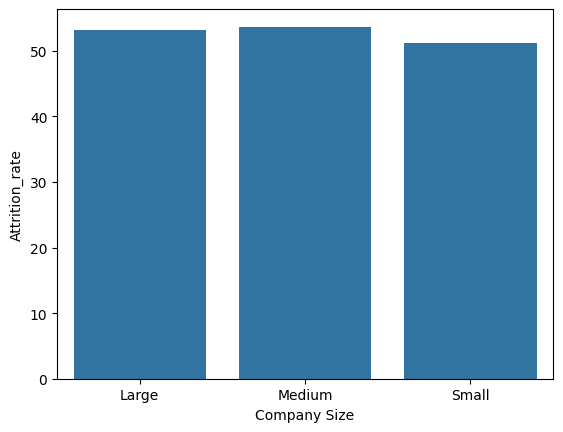

In [68]:
sns.barplot(data=company_size_attrition,x="Company Size",y="Attrition_rate")
plt.show()

In [69]:
emp_df_copy[["Monthly Income","Job Level"]]

,Monthly Income,Job Level
0,8029,Mid
1,4563,Entry
2,5583,Senior
3,5525,Entry
4,4604,Mid
...,...,...
14895,7830,Senior
14896,3856,Entry
14897,5654,Mid
14898,5276,Mid


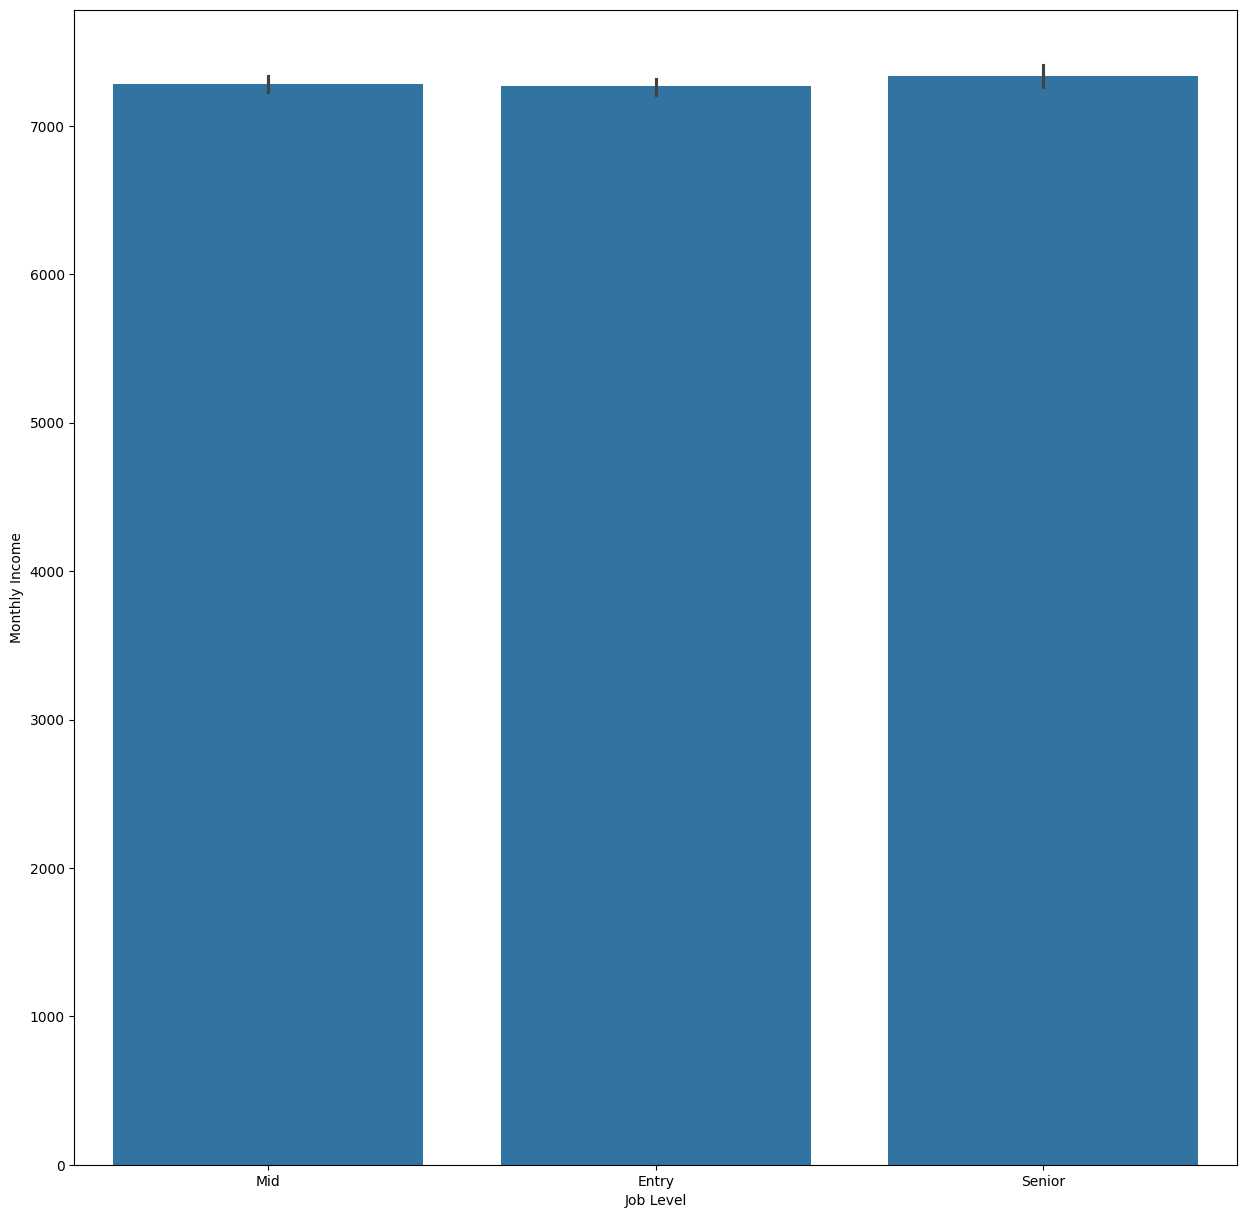

In [70]:
plt.figure(figsize=(15,15))
sns.barplot(data=emp_df_copy,y="Monthly Income",x="Job Level")
plt.show()

In [71]:
emp_df_copy[["Remote Work","Attrition_encode"]]

,Remote Work,Attrition_encode
0,No,1
1,No,0
2,No,1
3,No,0
4,Yes,1
...,...,...
14895,No,1
14896,No,0
14897,No,0
14898,No,1


In [72]:
emp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               14900 non-null  int64  
 1   Age                       14900 non-null  int64  
 2   Gender                    14900 non-null  object 
 3   Years at Company          14900 non-null  int64  
 4   Job Role                  14900 non-null  object 
 5   Monthly Income            14900 non-null  int64  
 6   Work-Life Balance         14900 non-null  object 
 7   Job Satisfaction          14900 non-null  object 
 8   Performance Rating        14900 non-null  object 
 9   Number of Promotions      14900 non-null  int64  
 10  Overtime                  14900 non-null  object 
 11  Distance from Home        14900 non-null  int64  
 12  Education Level           14900 non-null  object 
 13  Marital Status            14900 non-null  object 
 14  Number

In [73]:
emp_df_copy[["Number of Promotions","Attrition_encode"]]

,Number of Promotions,Attrition_encode
0,1,1
1,1,0
2,3,1
3,0,0
4,0,1
...,...,...
14895,0,1
14896,2,0
14897,0,0
14898,0,1


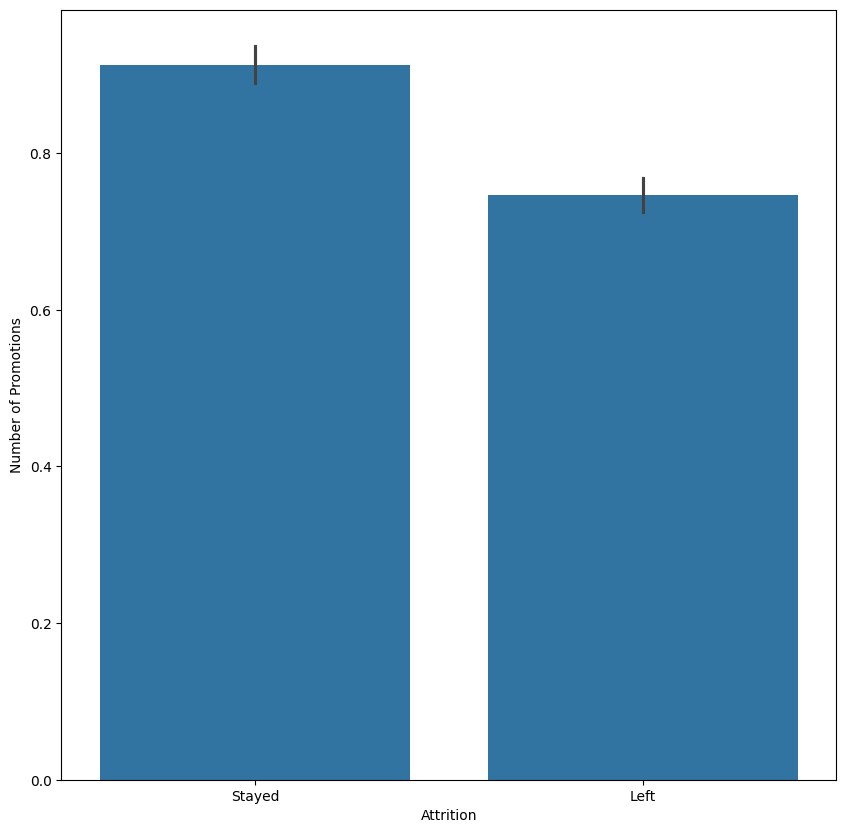

In [74]:
plt.figure(figsize=(10,10))
sns.barplot(y=emp_df_copy["Number of Promotions"],x=emp_df_copy["Attrition"])
plt.show()